<a href="https://colab.research.google.com/github/xxxcrttt/MLDL/blob/main/%E5%88%A9%E7%94%A8Python%E8%BF%9B%E8%A1%8C%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90/Cp4_Numpy%E5%9F%BA%E7%A1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.ndarray: 多维数组对象**
N-dimentional array: N维数组对象，是一个通用的同构数据多维同期，其中所有的元素必须是相同类型的。  
每个数组都有一个 ```shape``` (表示各个维度大小的元组) 和一个 ```dtype```(用于说明数组数据类型的对象)

### 创建 ndarray
使用```array```函数，接受一切序列型的对象(包括其他数组), 然后产生一个新的含有传入数据的NumPy数组

In [1]:
import numpy as np

In [2]:

data1 = [6, 7.5,8,0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列 -- 比如由一组等长列表组成的列表 -- 将会被转换为一个多维数组

In [3]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [4]:
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


除非显示说明(explicit), np.array 会尝试为新建的数组推断出一个比较合适的数据类型，数据类型会保存在```dtype```对象中

In [5]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


```zeros```和```ones``` 分别可以创建指定长度或形状的全都是 0 or 1 的数组；  
```empty```可以创建一个没有具体值的数组 -- 只需要传入一个表示形状的元组即可

In [6]:
np.zeros(10)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
np.ones((3,6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [8]:
np.empty((2,3,2))
# 认为empty会返回全0数组的想法是不安全的，大多数情况下它返回的都是一些未初始化的垃圾值

array([[[2.24396395e-316, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

```arange```是Python内置函数 range 的数组版

In [9]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

*   ```array```: 将输入的数据（列表，元组，数组或其他数据类型）转换为 ndarray, 要么能推断出 dtype 要么显式的指定 dtype, 默认直接复制输入数据
*   ```asarray```: 将输入数据转换为 ndarray, 如果输入数据本身是 ndarray 则不进行复制
*  ```arange```: 类似于内置函数 range, 但返回一个 ndarray 而不是 list
*  ```ones, ones_like```: 根据指定的形状和 dtype 创建一个全 1 的数组; ones_like 以另一个数组为参数，并根据其形状和dtype 创建一个全 1 数组
* ```zeros, zeros_like / empty, empty_like```
* ```eye, identity```: 创建一个正方的 N x N 的单位矩阵(对角线为1，其余为0)





### **ndarray的数据类型**
```dtype``` 是一个特殊对象，它含有ndarray 将一块内存解释为特定数据类型所需的信息

numpy支持 int8/16/32/64, uint8/16/32/64, float16/32/64/128, complex64/128/256, bool, object, string_, unicode_ etc.

In [10]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32) 
print(arr1.dtype)
print(arr2.dtype)

float64
int32


可以通过```astype```的方法显式的转换dtype  
如果从 float 转换成 int 则小数部分将会被截断

调用 astype 无论如何都会创建出一个新的数组(原始数组的一份拷贝)，即使新的 dtype 和原来的相同也是如此

In [11]:
arr = np.array([3.7,-1.2,-2.6,0.5,12.9,10.1])
arr.dtype

dtype('float64')

In [12]:
int_arr = arr.astype(np.int32)
int_arr

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

### 数组和标量之间的运算
**vectorization** 对数组执行批量运算

不同大小的数组之间的运算叫做广播 (broadcasting)


In [13]:
arr  = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [14]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [15]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [16]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

### 基本的切片和索引

当将一个标量赋值给一个切片时 (```arr[5:8] = 12```) 该值会自动传播到整个区域，跟列表最重要的区别在于数组切片是原始数组的视图 -- 意味着数据不会被复制，而会直接反应在原数组上   
如果想要得到一份copy 需要显示的进行复制操作 ```arr[5:8].copy()```

In [17]:
arr = np.arange(10)
print(arr[5])
print(arr[5:8])


5
[5 6 7]


In [18]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [19]:
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [20]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

在二维数组中各个索引位置上的元素不再是标量而是一维数组   
因此可以对各个元素进行递归访问，也可以传入一个用逗号隔开的索引列表来选取单个元素

In [21]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr2d[2])
print(arr2d[0][2])
print(arr2d[0,2])

[7 8 9]
3
3


在多维数组中如果省略了后面的索引，则返回对象会是一个维度低一点的 ndarray -- 它含有高一级维度上所有的数据

In [22]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(arr3d)

print(arr3d[0])

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[1 2 3]
 [4 5 6]]


In [23]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [24]:
arr3d[0] = old_values 
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

### 切片索引 slice index 
切片是沿着一个轴向选取元素，此时切片只能得到相同维数的数组视图   
通过将整数索引和切片混合，可以得到低维度的切片

":" 只有冒号则表示选取整个轴

```arr[:2,1:]```: shape(2,2)   
```arr[2]```: shape(3,)   
```arr[2,:]```: shape(3,)    
```arr[2:,:]```: shape(1,3)   
```arr[:,:2]```: shape(3,2)


In [25]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [26]:
arr2d[:2] #选取arr2d的前两行

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
arr2d[1,:2]

array([4, 5])

In [28]:
arr2d[:,:1] #选取第2列全部轴

array([[1],
       [4],
       [7]])

In [29]:
# 对切片赋值会扩散到整个选区
arr2d[:2,1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Bool 索引

数组的比较运算(==) 也是矢量化的，比较将会产生Bool 值   
Bool型数组的长度必须跟被索引的轴长度一致   

选择不等于的话，可以使用(!=) 也可以使用 ~ 对条件进行否定

选取多个则需要使用 &, | 等 bool 运算符

通过Bool index 选取数组中的数据，将总是创建数据中的副本，即使返回一模一样的数组也是如此

* Python 中的 and 和 or 关键词在Bool 型数组中无效！！必须使用 & |



In [30]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[ 0.39793969 -0.96069804 -0.68024146 -0.11604189]
 [-0.18256418  0.77534268  0.07501731 -1.43840415]
 [-0.18800091  0.59722468 -0.65669687 -0.00504873]
 [-1.02298528 -0.42237157  0.32051936 -1.5587244 ]
 [-0.98684889  2.07937157 -0.8541416   0.61097657]
 [ 0.45044729  1.4357755   0.62330579  1.0976371 ]
 [-0.91069784 -0.18176355  0.74099584  0.96711693]]


In [31]:
# 假设每个名字都对应data数组中的一行，需要选取'Bob'对应的所有行 
# 因此比较会产生一个Bool value
names == "Bob"


array([ True, False, False,  True, False, False, False])

In [32]:
# 这个布尔型数组可用于数组索引
data[names == 'Bob']

array([[ 0.39793969, -0.96069804, -0.68024146, -0.11604189],
       [-1.02298528, -0.42237157,  0.32051936, -1.5587244 ]])

In [33]:
data[names == 'Bob', 2:]


array([[-0.68024146, -0.11604189],
       [ 0.32051936, -1.5587244 ]])

In [34]:
data[names == 'Bob', 3]

array([-0.11604189, -1.5587244 ])

In [35]:
names != 'Bob'
data[~(names =='Bob')]

array([[-0.18256418,  0.77534268,  0.07501731, -1.43840415],
       [-0.18800091,  0.59722468, -0.65669687, -0.00504873],
       [-0.98684889,  2.07937157, -0.8541416 ,  0.61097657],
       [ 0.45044729,  1.4357755 ,  0.62330579,  1.0976371 ],
       [-0.91069784, -0.18176355,  0.74099584,  0.96711693]])

In [36]:
mask = (names =='Bob') | (names == 'Will')
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[ 0.39793969 -0.96069804 -0.68024146 -0.11604189]
 [-0.18800091  0.59722468 -0.65669687 -0.00504873]
 [-1.02298528 -0.42237157  0.32051936 -1.5587244 ]
 [-0.98684889  2.07937157 -0.8541416   0.61097657]]


In [37]:
# 通过Bool设置值，将data中所有负值设置为负
data[data < 0] = 0
data

array([[0.39793969, 0.        , 0.        , 0.        ],
       [0.        , 0.77534268, 0.07501731, 0.        ],
       [0.        , 0.59722468, 0.        , 0.        ],
       [0.        , 0.        , 0.32051936, 0.        ],
       [0.        , 2.07937157, 0.        , 0.61097657],
       [0.45044729, 1.4357755 , 0.62330579, 1.0976371 ],
       [0.        , 0.        , 0.74099584, 0.96711693]])

In [38]:
# 通过一维Bool数组设置整行 or 列的值
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.77534268, 0.07501731, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.45044729, 1.4357755 , 0.62330579, 1.0976371 ],
       [0.        , 0.        , 0.74099584, 0.96711693]])

### 花式索引 fancy indexing 
利用整数数组进行索引, 无论数组的维度，花式索引总是一维的

且跟切片不同，花式索引总是将数组复制到新的数组中

In [39]:
arr = np.empty((8,4))

for i in range(8):
  arr[i] = i 

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [40]:
# 为了以特定顺序选取行子集，只需传入一个制定顺序的整数列表或ndarray即可
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [41]:
# 使用负数索引会从末尾开始选取行
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [42]:
# 一次性传入多个索引数组会返回一个一维数组，其中的元素对应各个索引元素
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [43]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

### 数组转置和轴对换 transformation 
转置是重塑的一种特殊形式，他返回的是原数据的视图（不会进行任何的复制操作）  
数组不仅有 transpose 方法 还有T属性

```transpose```的作用是改变序列，对于二维 ndarray 在不指定参数的情况下默认是矩阵转置

In [44]:
arr = np.arange(15).reshape((3,5))
print(arr)
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [45]:
# 进行矩阵计算，利用 np.dot 计算矩阵内积
arr = np.random.randn(6,3)
print(arr) 
np.dot(arr.T, arr)

[[ 0.50632514  1.35307321 -1.57779669]
 [-0.64917467 -0.35769762  0.49085804]
 [-0.26183352 -0.84583429 -0.06868465]
 [-1.89736413 -0.22148925 -0.01657011]
 [ 2.14518591 -1.53099207  0.15050495]
 [ 0.39481374  0.25531233 -0.35018689]]


array([[ 9.10404083, -1.62444506, -0.88350476],
       [-1.62444506,  5.13236894, -2.56851616],
       [-0.88350476, -2.56851616,  2.88065874]])

In [46]:
# 对于高维数组，transpose 需要得到一个由轴编号组成的元组才能对这些轴进行转置
arr = np.arange(16).reshape((2,2,4))
print(arr)

arr.transpose((1,0,2)) # 将0轴和1轴的位置交换，2轴位置不变


[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [47]:
# swapaxes: 需要接受一对轴的编号进行交换
# 它也返回源数据的视图，不会进行任何复制操作
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## **2. 通用函数: 快速的元素级数组函数**
**ufunc** 通用函数是一种对 ndarray 中的数据执行元素级运算的函数, 可以看成是简单函数的矢量化包装器

**Binary ufunc** 二元函数，接受两个数组(如add，maximum)

有些ufunc 可以返回多个数组，比如modf 

In [48]:
arr = np.arange(10)
print(np.sqrt(arr))
print(np.exp(arr))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [49]:
x = np.random.randn(8)
y = np.random.randn(8)
print(np.maximum(x,y))

[0.67670941 0.71251153 0.55808842 0.87613257 0.19375991 2.45780528
 0.03814485 0.84912921]


In [50]:
# modf: Python内置函数 divmod 的矢量化，返回浮点数组的小数和整数部分
arr = np.random.randn(7) * 5
remainder, whole_part = np.modf(arr)

print(remainder)
print(whole_part)

[-0.65505249  0.7636299  -0.36666139 -0.19414029  0.10296605 -0.11376425
  0.95253987]
[-3.  1. -2. -2.  5. -1.  0.]


**一元 ufunc**
* ```abs, fabs```: 计算整数，浮点数或复数的绝对值; 对于非负数值可以使用更快的fabs
* ```sqrt```: 计算各元素的平方根 ```arr ** 0.5``` 
* ```square```: 计算各元素的平方 ```arr ** 2```
* ```exp```: 指数 e^x
* ```log, log10, log2, log1p```: log值
* ```sign```: 各元素的正负号: 1,0,-1
* ```ceil```: 大于等于该值的最小整数
* ```floor```: 小于等于该值的最大整数
* ```rint```: 各元素值四舍五入到最接近的整数，保留 dtype
* ```modf```: 将数组的小数和整数部分以两个独立的数组形式返回
* ```isnan```: 返回表示是否是 nan 的布尔型数组
* ```isfinite, isinf```: 返回表示哪些是 inf 或 isinf 的布尔型数组
* ```cos, cosh, sin, sinh, tan, tanh```: 普通和双曲的三角函数
* ```arccos, arccosh, arcsin,arcsinh, arctan, arctanh```: 反三角函数
* ```logical_not```: 计算各元素 not x 的真值 相当于 -arr

**二元 ufunc**
* ```add, subtract, multiply, power```: 加，减，乘，乘方
* ```divide, floor_divide```: 除法, 向下圆整除法(丢弃余数)
* ```maximum, fmax; minimum, fmin```: 元素级的最大/小值计算, fmax/fmin 将忽略NaN
* ```mod```: 求模计算(除法的余数)
* ```cppysign```: 将第二个数组中的值的符号复制给第一个数组
* ```greater, greater_equal, less, less_equal, equal, not_equal```: 执行元素级的比较运算，最终产生布尔型数组 >, >=, <, <=, ==, != 
* ```logical_and, logical_or, logical_xor```: 真值逻辑运算,&， |， ^ 

## **3.利用数组进行数据处理**

用数组表达式代替循环的做法被称为 ”矢量化“

In [51]:
points = np.arange(-5,5,0.01) # 1000 equally spaced points 

# meshgrid 函数接受两个一维数组，并产生两个二维矩阵
xs, ys = np.meshgrid(points, points)
print(ys)

# 在一组值(网格型) 上计算函数 sqrt(x^2 + y^2)
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

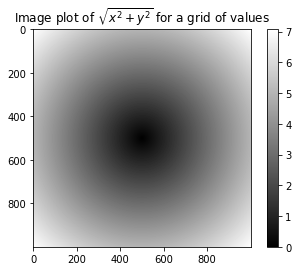

In [52]:
# visualisation 
import matplotlib.pyplot as plt 
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 将条件逻辑表述为数组运算
```numpy.where```函数是三元表达式```x if condition else y```的矢量化版本



In [53]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True, False, True, True, False])

# 根据cond中的值选取 xarr和yarr的值：
# 当cond中的值为True时，选取xarr的值；否则选取yarr的值
result = [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [54]:
result = np.where(cond, xarr, yarr)
result 

# np.where 的第二个 & 第三个参数不必是数组，他们都可以是标量值
# where 通常用于根据另一个数组而产生一个新的数组

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [55]:
arr = np.random.randn(4,4)
print(arr)

print(arr>0)

print(np.where(arr > 0,2,-2))

[[-1.36798851  0.39984974 -2.37339853 -0.56946072]
 [-0.66061419 -1.82775922 -1.19248316 -2.05446063]
 [ 0.43860778 -0.6588323  -1.49994389 -1.37681304]
 [-0.14584635  0.51956256  1.15603754 -0.10921103]]
[[False  True False False]
 [False False False False]
 [ True False False False]
 [False  True  True False]]
[[-2  2 -2 -2]
 [-2 -2 -2 -2]
 [ 2 -2 -2 -2]
 [-2  2  2 -2]]


In [56]:
# 将标量和数组结合
np.where(arr > 0, 2, arr) # set only positive values to 2


array([[-1.36798851,  2.        , -2.37339853, -0.56946072],
       [-0.66061419, -1.82775922, -1.19248316, -2.05446063],
       [ 2.        , -0.6588323 , -1.49994389, -1.37681304],
       [-0.14584635,  2.        ,  2.        , -0.10921103]])

### 数学和统计方法
可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算  
```sum, mean, std``` 等 aggregation 既可以当做数组的的实例方法调用，也可以当做顶级NumPy函数使用

```mean, sum``` 这类函数可以接受一个axis 选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组

In [57]:
arr = np.random.randn(5,4)
print(arr)

print(arr.mean())
print(np.mean(arr))
print(arr.sum())

[[ 1.55750514 -1.10846163 -0.8092775   0.24662179]
 [ 1.26057578 -1.11891745 -2.09356813  0.61853759]
 [ 0.405059   -1.13121313 -0.46220786 -0.89570281]
 [ 2.38875959 -0.05510278  1.10146593 -0.96376399]
 [-0.56451013  0.00379003  0.91864842  1.83404443]]
0.056614115226275664
0.056614115226275664
1.1322823045255133


In [58]:
print(arr.mean(axis=1)) # arr.mean(1) 计算行的平均值
print(arr.sum(axis=0)) # arr.sum(0) 计算每列的和


[-0.02840305 -0.33334306 -0.5210162   0.61783969  0.54799319]
[ 5.04738938 -3.40990495 -1.34493914  0.83973701]


在多维数组中，累加函数(```cumsum```etc.) 返回的是同样大小的数组，但是会根据每个低维的切片沿着标记轴计算部分聚类

In [59]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(arr)

print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


基本数组统计方法
* ```sum```: 对数组中全部或者某轴向的元素求和，零长度的数组 sum = 0 
* ```mean```: 算术平均数，零长度的数组 mean = NaN
* ```std, var```: 标准差 & 方差，自由度可调(默认为n)
* ```min, max```: 最小值，最大值
* ```argmin, argmax```: 最小和最大元素的index
* ```cumsum, cumprod```: 所有元素的累计和、累计积

### 用于布尔型数组的方法
布尔值会被强制转换为 1(True) & 0(False)，因此 sum 经常被用来对于布尔型数组中的True值计数

* ```any```用于测试数组中是否存在一个或多个 True, ```all```检查数组中是否所有值都是True; 也可以用于非布尔型数组，所有非 0 元素将会被当做True


In [60]:
arr = np.random.randn(100)
(arr > 0).sum() # numbers of positive values 

54

In [61]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


### 排序
可以通过```sort```方法进行就地排序   
多维数组可以在任何一个轴上进行排序，只需将轴编号传给sort即可   
顶级方法```np.sort```返回的数组是已排序副本，而就地排序则会修改数组本身；   
计算数组分位数最简单的方法就是对其进行排序，然后选取特定位置的值

In [62]:
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)

[ 0.50329865  0.61273649 -0.04781705 -1.47819311 -0.24038144 -0.5015626 ]
[-1.47819311 -0.5015626  -0.24038144 -0.04781705  0.50329865  0.61273649]


In [63]:
arr = np.random.randn(5, 3)
arr.sort(1)
print(arr)

[[-0.58893493 -0.31815744 -0.236303  ]
 [ 0.91996482  0.97774726  1.26716708]
 [-0.46683481  0.02925799  1.09456784]
 [ 0.22685308  1.25897147  2.69723741]
 [-0.38609353  0.76203544  1.42398432]]


In [64]:
large_arr = np.random.randn(10000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile 

-1.6797454291551832

### 唯一化以及其他的集合逻辑
```np.unique``` 用于找出数组中的唯一值并返回已排序的结果   
```np.in1d```用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组

In [65]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob','Will', 'Joe', 'Joe'])
print(np.unique(names))

ints = np.array([3,3,3,3,3,2,2,4,4])
print(np.unique(ints))

['Bob' 'Joe' 'Will']
[2 3 4]


In [66]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])


array([ True, False, False,  True,  True, False,  True])

* ```unique(x)```: 计算x中的唯一元素，并返回有序结果
* ```intersect1d(x,y)```: 计算x和y中的公共元素，并返回有序结果
* ```union1d(x,y)```: 计算x和y的并集，并返回有序结果
* ```in1d(x,y)```:得到一个表示 ”x的元素是够包含于y“ 的布尔型数组
* ```setdiff1d(x,y)```: 集合的差，及元素在x但不在y中
* ```setxor1d(x,y)```: 集合的对称差，及存在于一个数组中但不同时存在于两个数组中的元素

## **4. 用于数组的文件输入输出**
Numpy 能够读写磁盘上的文本数据 or 二进制数组   
```np.save, np.load```是读写磁盘数组数据的两个主要函数，默认情况下数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中

```np.savez```可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可

如果要将数组压缩，可以使用```numpy.savez_compressed```


## **5. 线性代数**
矩阵乘法，矩阵分解，行列式等，numpy提供一个用于矩阵乘法的 dot 函数，即是一个数组方法也是numpy命名空间中的一个函数

```x.dot(y) == np.dot(x,y)```    

一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组

@符号也可以用作中缀运算符，进行矩阵乘法

In [67]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])
print(x.dot(y))
print(np.dot(x,y))

[[ 28.  64.]
 [ 67. 181.]]
[[ 28.  64.]
 [ 67. 181.]]


In [68]:
print(np.dot(x, np.ones(3)))
print(x @ np.ones(3))

[ 6. 15.]
[ 6. 15.]


```numpy.linalg```中有一次校准的矩阵分解运算以及如求逆和行列式等函数

In [69]:
from numpy.linalg import inv, qr
X = np.random.randn(5,5)
mat = X.T.dot(X) # 计算X和转置 X.T 的点积
print(inv(mat))

print(mat.dot(inv(mat)))

q,r = qr(mat)
print(r)

[[ 0.45382358  0.5063119  -0.51594184 -0.01295113 -0.16199344]
 [ 0.5063119   4.20000355 -3.78280596  1.81171681 -0.64224577]
 [-0.51594184 -3.78280596  3.61943033 -1.60358187  0.55949832]
 [-0.01295113  1.81171681 -1.60358187  1.26025214 -0.31185953]
 [-0.16199344 -0.64224577  0.55949832 -0.31185953  0.3106672 ]]
[[ 1.00000000e+00  4.93947500e-16 -2.96790281e-16 -1.10646963e-16
  -1.49148095e-16]
 [ 4.18062007e-16  1.00000000e+00 -2.69567765e-15  1.71481211e-15
  -6.39159632e-16]
 [-1.84136670e-16  1.24433087e-15  1.00000000e+00  3.67728458e-16
  -3.75145316e-16]
 [ 1.88256832e-16  1.36842603e-16 -6.74484039e-16  1.00000000e+00
   1.47545327e-17]
 [ 1.44227320e-16 -5.78200056e-17  5.88406964e-16  2.67061404e-16
   1.00000000e+00]]
[[-5.76482716 -0.6039236  -2.44678449 -3.86549975 -5.0200519 ]
 [ 0.         -6.73086179 -6.40114434  1.37122397 -1.31355054]
 [ 0.          0.         -1.06556137 -1.26847969  2.45463961]
 [ 0.          0.          0.         -1.22166469 -3.29286788]
 [ 0. 

* ```diag```: 以一维数组的形式返回方阵的对角线（or 非对角线）元素，或将一维数组转换为方阵（非对角线元素为0）
* ```dot```: 矩阵乘法
* ```trace```: 计算对角线元素的和
* ```det```: 计算矩阵行列式
* ```eig```: 计算方阵的本征值和本证向量
* ```inv```: 计算方阵的逆
* ```pinv```: 计算矩阵的额Moore-Penrose 伪逆
* ```qr```: 计算QR分解
* ```svd```: 计算奇异值分解(SVD) 
* ```solve```: 解线性方程组 Ax=b, 其中A为一个方阵
* ```lstsq```: 计算 Ax = b 的最小二乘解

## **6. 伪随机数生成**
```numpy.random```对于Python内置的random进行补充，增加了一些用于高效生成多种概率分布的样本值的函数

伪随机数: 通过算法基于随机数生成器种子，在确定性的条件下生成的，可以用```np.random.seed```更改随机数生成种子

In [70]:
# 使用normal来得到一个标准正态分布的 4 x 4 样本数组
samples = np.random.normal(size=(4,4)) 
samples 

array([[ 1.41974702,  0.70749316,  0.15578424,  0.17569526],
       [ 1.28169371,  1.62128217,  0.90689364, -2.26751643],
       [ 0.69353557,  0.37671718,  1.57316435,  0.59046573],
       [ 0.14024132,  1.31375257, -0.8300153 , -0.12373386]])

In [71]:
from random import normalvariate
N = 10000000 
%timeit samples = [normalvariate(0,1) for _ in range(N)]

12.2 s ± 1.56 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%timeit np.random.normal(size=N)

538 ms ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


```numpy.random```的数据成圣函数使用了全局的随机种子，要避免全局状态，可以使用```numpy.random.RandomState```创建一个与其他隔离的随机数生成器

In [73]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

* ```seed```: 确定随机数生成器的种子
* ```permutation```: 返回一个序列的随机排列或返回一个随机排列的范围
* ```shuffle```: 对一个序列就地随机排列
* ```rand```: 产生均匀分布的样本值
* ```randint```: 从给定的上下限范围内随机选取整数
* ```randn```: 产生正态分布(mean=1, std=1)的样本值
* ```binomial```: 产生二项分布的样本值
* ```normal```: 产生正态(高斯)分布
* ```beta```: 产生Beta分布 
* ```chisquare```: 产生卡方分布
* ```gamma```: 产生Gamma分布
* ```uniform````: 产生在[0,1) 中均匀分布的样本值

## **7. example: 随机漫步**
简单的随机漫步: 从0开始，步长 1 和 -1 出现的概率相等




In [77]:
import random 
position = 0 
walk = [position]
steps = 1000 
for i in range(steps):
  step = 1 if random.randint(0,1) else -1 
  position += step 
  walk.append(position)

In [79]:
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

print(walk.min())
print(walk.max())

-33
9


随机漫步过程中第一次到达某个特定值的时间
1. ```np.abs(walk) >= 10``` 可以得到一个布尔型数组，他表示的是距离是否达到或超过10 
2. ```argmax``` 返回该布尔型数组第一个最大值的索引, 他无论如何都会对数组进行完全扫描

In [80]:
(np.abs(walk) >= 10).argmax()

51

#### 一次模拟多个随机漫步


In [83]:
nwalks = 5000 
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print(walks)
print(walks.max())
print(walks.min())

[[ -1  -2  -3 ... -30 -31 -30]
 [ -1  -2  -1 ...  14  13  14]
 [ -1   0   1 ... -10  -9 -10]
 ...
 [  1   0   1 ... -26 -27 -26]
 [  1   2   3 ... -60 -61 -62]
 [  1   0  -1 ... -50 -51 -52]]
109
-121


In [85]:
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
print(hits30.sum())

# 时间
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(crossing_times.mean())

[ True False  True ...  True  True  True]
3400
502.5270588235294


In [86]:
# normal分布
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))